In [1]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys

09/18/2018  09:55 PM    <DIR>          .
09/18/2018  09:55 PM    <DIR>          ..
09/15/2018  04:24 PM                39 .gitignore
09/18/2018  09:55 PM    <DIR>          .ipynb_checkpoints
09/18/2018  11:31 AM    <DIR>          data
09/15/2018  11:18 PM            71,720 FOREX Attempt1.ipynb
09/18/2018  09:55 PM           616,472 Moving Average Backtesting-Copy1.ipynb
09/18/2018  09:54 PM           616,472 Moving Average Backtesting.ipynb
09/18/2018  03:47 PM            15,953 Moving Average Optimum Portfolio-Copy1.ipynb
09/18/2018  07:32 PM           635,202 Moving Average Optimum Portfolio.ipynb
09/15/2018  04:24 PM                10 README.md
               7 File(s)      1,955,868 bytes
               4 Dir(s)  17,034,080,256 bytes free


In [2]:
!dir data

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys\data

09/18/2018  11:31 AM    <DIR>          .
09/18/2018  11:31 AM    <DIR>          ..
09/18/2018  11:31 AM           279,521 DEXALUS.csv
09/15/2018  04:27 PM           116,197 DEXBZUS.csv
09/15/2018  04:27 PM           233,952 DEXCAUS.csv
09/15/2018  04:27 PM           184,596 DEXCHUS.csv
09/15/2018  04:27 PM           234,285 DEXDNUS.csv
09/15/2018  04:27 PM           184,896 DEXHKUS.csv
09/15/2018  04:27 PM           232,957 DEXINUS.csv
09/15/2018  04:27 PM           232,378 DEXJPUS.csv
09/15/2018  04:27 PM           187,964 DEXKOUS.csv
09/15/2018  04:27 PM           233,812 DEXMAUS.csv
09/15/2018  04:27 PM           125,895 DEXMXUS.csv
09/15/2018  04:27 PM           233,917 DEXNOUS.csv
09/18/2018  11:30 AM           279,258 DEXNZUS.csv
09/15/2018  04:27 PM           234,242 DEXSDUS.csv
09/15/2018  04:27 PM           193,276 DEXSFUS.csv
09/15/2

In [3]:
baseDir = 'data/'

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
def readDEX(filepath):
    rawData = pd.read_csv(filepath).replace('.', np.nan).fillna(method='ffill')
    # TODO : Parse dates
    rawData.VALUE = rawData.VALUE.astype(float)
    return rawData

In [13]:
# Read csv, remove invalid data
eurusd = readDEX(baseDir + 'DEXUSEU.csv')
gbpusd = readDEX(baseDir + 'DEXUSUK.csv')
usdgbp = readDEX(baseDir + 'DEXUKUS.csv')
usdjpy = readDEX(baseDir + 'DEXJPUS.csv')
usdchf = readDEX(baseDir + 'DEXSZUS.csv')
usdcad = readDEX(baseDir + 'DEXCAUS.csv')
audusd = readDEX(baseDir + 'DEXUSAL.csv')
usdaud = readDEX(baseDir + 'DEXALUS.csv')
nzdusd = readDEX(baseDir + 'DEXUSNZ.csv')
usdnzd = readDEX(baseDir + 'DEXNZUS.csv')
usdsek = readDEX(baseDir + 'DEXSDUS.csv')
usdnok = readDEX(baseDir + 'DEXNOUS.csv')

In [8]:
def MAstratsplice(myVar,x,y,ShortMA,LongMA):
    XR = readDEX(baseDir + myVar + '.csv')
    XR = XR.loc[x:y]
    XR['ShortMA'] = XR.VALUE.rolling(window=ShortMA).mean()
    XR['LongMA'] = XR.VALUE.rolling(window=LongMA).mean()
    
    XR['Differential'] = XR['ShortMA'] - XR['LongMA']
    
    X = 0
    XR['Stance'] = np.where(XR['Differential'] > X, 1, 0)
    XR['Stance'] = np.where(XR['Differential'] < X, -1, XR['Stance'])
    XR['Stance'].value_counts()
    
    XR['Returns'] = XR.VALUE.pct_change()[1:] * 100
    XR['Strategy'] = XR['Returns'] * XR['Stance'].shift(1)
    
    XR['StrategyPerformance'] = XR['Strategy'].cumsum() + 100
    XR['StrategyPerformance%'] = (((XR['StrategyPerformance'][y]) / (XR['StrategyPerformance'][x])) - 1) * 100
    
    return (XR['Strategy'].cumsum()[y])
    # return (((XR['StrategyPerformance'][12434]) / (XR['StrategyPerformance'][1])) - 1) * 100

In [9]:
ShortMA = np.linspace(10,100,19,dtype=int)
LongMA = np.linspace(110,200,19,dtype=int)

results_pnl = np.zeros((len(ShortMA),len(LongMA)))

# USD/GBP Analysis

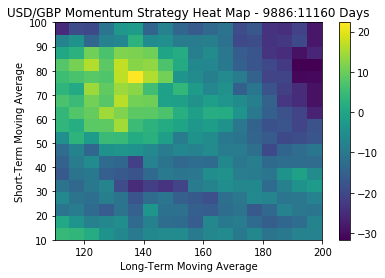

110     7.818773
115    10.979300
120    16.087295
125    14.532948
130    17.108796
135    22.275205
140    15.869420
145    10.763605
150     3.795924
155    -1.529905
160     1.955478
165     1.486775
170    -3.866835
175    -6.259600
180    -7.312030
185    -4.158671
190    -1.116415
195    -2.297391
200    -2.135722
dtype: float64
10      4.355390
15      0.680855
20     -3.316182
25     -2.135722
30     -2.297391
35     -1.116415
40     -5.793856
45     -3.563916
50      4.939397
55     14.784709
60     14.532948
65     16.411381
70     14.283725
75     22.275205
80     17.108796
85     11.804989
90      2.990862
95     -2.093967
100   -14.311082
dtype: float64


In [16]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXUKUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/GBP Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

75/135 Strategy

count    1274.000000
mean        0.021494
std         0.561538
min        -2.743736
25%        -0.229877
50%         0.000000
75%         0.259593
max         8.512354
Name: Strategy, dtype: float64

Skew: 2.7847
Kurtosis: 42.7247


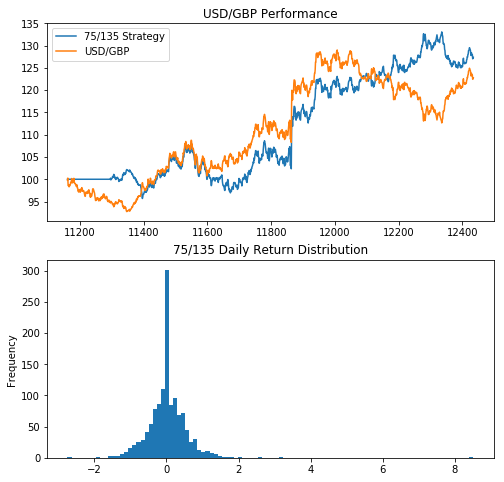

In [24]:
############################################################## 75/135 ##########################################################
usdgbp = usdgbp.loc[11160:12434]
usdgbp['ShortMA'] = usdgbp.VALUE.rolling(75).mean()
usdgbp['LongMA'] = usdgbp.VALUE.rolling(135).mean()

usdgbp['Differential'] = usdgbp['ShortMA'] - usdgbp['LongMA']

X = 0
usdgbp['Stance'] = np.where(usdgbp['Differential'] > X, 1, 0)
usdgbp['Stance'] = np.where(usdgbp['Differential'] < X, -1, usdgbp['Stance'])
usdgbp['Stance'].value_counts()

usdgbp['Returns'] = usdgbp.VALUE.pct_change()[1:] * 100
usdgbp['Strategy'] = usdgbp['Returns'] * usdgbp['Stance'].shift(1)

usdgbp['StrategyPerformance'] = usdgbp['Strategy'].cumsum() + 100

usdgbp['StrategySuccess'] = np.where(usdgbp['Strategy'] > 1, 1, 0)

## Performance
print("75/135 Strategy" "\n")
plt.subplot(2,1,1)
print(usdgbp['Strategy'].describe());
usdgbp['StrategyPerformance'].plot(figsize = (8,8), label='75/135 Strategy');
plt.plot(usdgbp['Returns'].cumsum() + 100, label='USD/GBP');
plt.legend()
plt.title("USD/GBP Performance");

## Distributions
plt.subplot(2,1,2)
usdgbp['Strategy'].plot(kind='hist', figsize=(8,8), title='75/135 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdgbp['Strategy'].skew(),4));
print("Kurtosis:",round(usdgbp['Strategy'].kurt(),4));


# USD/JPY Analysis

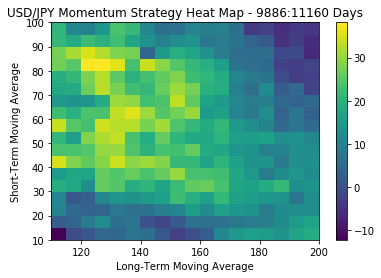

110    34.806296
115    31.631426
120    37.976992
125    38.150715
130    35.959711
135    35.649270
140    33.861971
145    31.078871
150    33.097163
155    30.448797
160    26.449407
165    23.419137
170    17.878300
175    16.457121
180    18.721980
185    21.531974
190    17.093606
195    18.682457
200    17.524262
dtype: float64
10     18.682457
15     17.524262
20     16.945566
25     22.302068
30     26.449407
35     30.233824
40     34.806296
45     30.473166
50     33.252877
55     34.337058
60     35.649270
65     33.097163
70     32.747121
75     32.463683
80     38.150715
85     35.155357
90     22.725780
95     23.709381
100    28.398636
dtype: float64


In [25]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXJPUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/JPY Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

80/125 Strategy

count    1274.000000
mean       -0.004468
std         0.553101
min        -2.907215
25%        -0.251558
50%         0.000000
75%         0.244070
max         3.437205
Name: Strategy, dtype: float64

Skew: 0.2958
Kurtosis: 4.5583


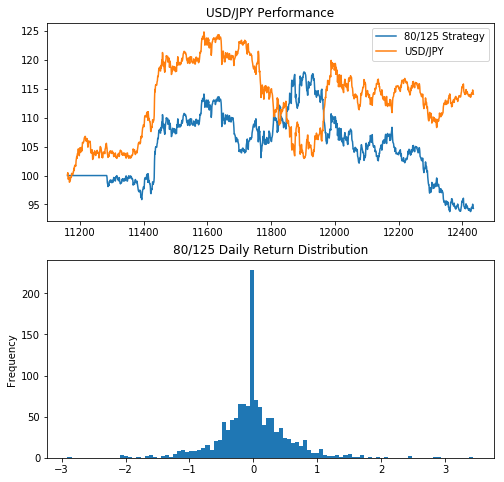

In [35]:
############################################################## 80/125 ##########################################################
usdjpy = usdjpy.loc[11160:12434]
usdjpy['ShortMA'] = usdjpy.VALUE.rolling(80).mean()
usdjpy['LongMA'] = usdjpy.VALUE.rolling(125).mean()

usdjpy['Differential'] = usdjpy['ShortMA'] - usdjpy['LongMA']

X = 0
usdjpy['Stance'] = np.where(usdjpy['Differential'] > X, 1, 0)
usdjpy['Stance'] = np.where(usdjpy['Differential'] < X, -1, usdjpy['Stance'])
usdjpy['Stance'].value_counts()

usdjpy['Returns'] = usdjpy.VALUE.pct_change()[1:] * 100
usdjpy['Strategy'] = usdjpy['Returns'] * usdjpy['Stance'].shift(1)

usdjpy['StrategyPerformance'] = usdjpy['Strategy'].cumsum() + 100

usdjpy['StrategySuccess'] = np.where(usdjpy['Strategy'] > 1, 1, 0)

## Performance
print("80/125 Strategy" "\n")
plt.subplot(2,1,1)
print(usdjpy['Strategy'].describe());
usdjpy['StrategyPerformance'].plot(figsize = (8,8), label='80/125 Strategy');
plt.plot(usdjpy['Returns'].cumsum() + 100, label='USD/JPY');
plt.legend()
plt.title("USD/JPY Performance");

## Distributions
plt.subplot(2,1,2)
usdjpy['Strategy'].plot(kind='hist', figsize=(8,8), title='80/125 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdjpy['Strategy'].skew(),4));
print("Kurtosis:",round(usdjpy['Strategy'].kurt(),4));

# usd/chf

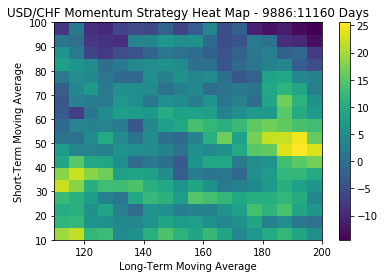

110    22.188532
115    22.300674
120    18.428717
125    16.605148
130    13.181664
135    14.171775
140    12.296745
145    14.229284
150    11.267952
155    14.828988
160    13.652056
165    16.605486
170    12.634592
175    17.205621
180    22.104785
185    23.467839
190    25.563957
195    23.305500
200    17.994733
dtype: float64
10     21.654957
15     12.259594
20     14.139598
25     14.828988
30     22.188532
35     22.300674
40     17.108171
45     25.563957
50     24.734761
55     16.844931
60     15.131029
65     16.938169
70     11.632452
75      9.565240
80      8.255511
85      6.347083
90      6.668519
95      3.794642
100    -3.102086
dtype: float64


In [29]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXSZUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/CHF Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

45/190 Strategy

count    1274.000000
mean       -0.011697
std         0.614049
min       -12.209988
25%        -0.231954
50%         0.000000
75%         0.233412
max         3.098492
Name: Strategy, dtype: float64

Skew: -6.3879
Kurtosis: 126.1118


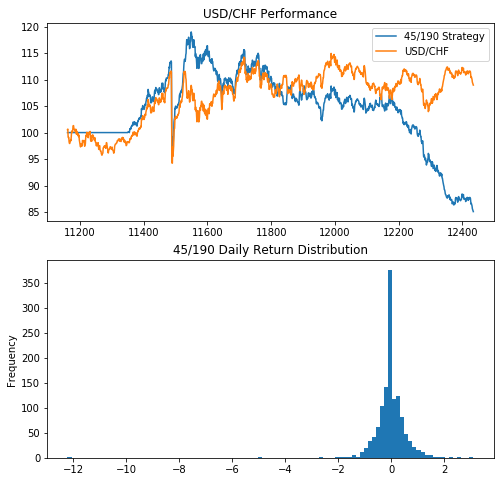

In [31]:
############################################################## 45/190 ##########################################################
usdchf = usdchf.loc[11160:12434]
usdchf['ShortMA'] = usdchf.VALUE.rolling(45).mean()
usdchf['LongMA'] = usdchf.VALUE.rolling(190).mean()

usdchf['Differential'] = usdchf['ShortMA'] - usdchf['LongMA']

X = 0
usdchf['Stance'] = np.where(usdchf['Differential'] > X, 1, 0)
usdchf['Stance'] = np.where(usdchf['Differential'] < X, -1, usdchf['Stance'])
usdchf['Stance'].value_counts()

usdchf['Returns'] = usdchf.VALUE.pct_change()[1:] * 100
usdchf['Strategy'] = usdchf['Returns'] * usdchf['Stance'].shift(1)

usdchf['StrategyPerformance'] = usdchf['Strategy'].cumsum() + 100

usdchf['StrategySuccess'] = np.where(usdchf['Strategy'] > 1, 1, 0)

## Performance
print("45/190 Strategy" "\n")
plt.subplot(2,1,1)
print(usdchf['Strategy'].describe());
usdchf['StrategyPerformance'].plot(figsize = (8,8), label='45/190 Strategy');
plt.plot(usdchf['Returns'].cumsum() + 100, label='USD/CHF');
plt.legend()
plt.title("USD/CHF Performance");

## Distributions
plt.subplot(2,1,2)
usdchf['Strategy'].plot(kind='hist', figsize=(8,8), title='45/190 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdchf['Strategy'].skew(),4));
print("Kurtosis:",round(usdchf['Strategy'].kurt(),4));

# usd/cad

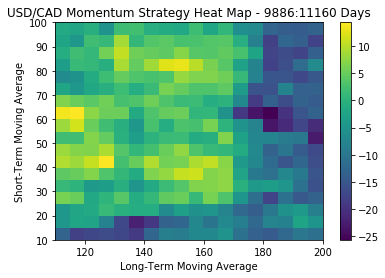

110    13.685428
115    14.248963
120    10.899740
125    14.362329
130    10.751955
135     5.511483
140     9.667318
145    12.395611
150    12.985424
155    11.336655
160    10.590597
165     7.604740
170     2.723482
175    -2.343561
180    -3.590983
185    -4.741088
190    -2.203796
195    -4.878481
200    -3.249351
dtype: float64
10     -5.053819
15     -1.965005
20      1.325823
25      6.194371
30      7.557177
35     11.336655
40     14.362329
45      9.310765
50      6.939618
55     11.616590
60     14.248963
65      6.811209
70      6.096398
75      7.962306
80     12.985424
85     10.751955
90      8.971566
95      2.249643
100     7.876252
dtype: float64


In [32]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXCAUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/CAD Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

40/125 Strategy

count    1274.000000
mean       -0.000775
std         0.480061
min        -2.858426
25%        -0.236186
50%         0.000000
75%         0.238207
max         2.416218
Name: Strategy, dtype: float64

Skew: -0.145
Kurtosis: 2.7176


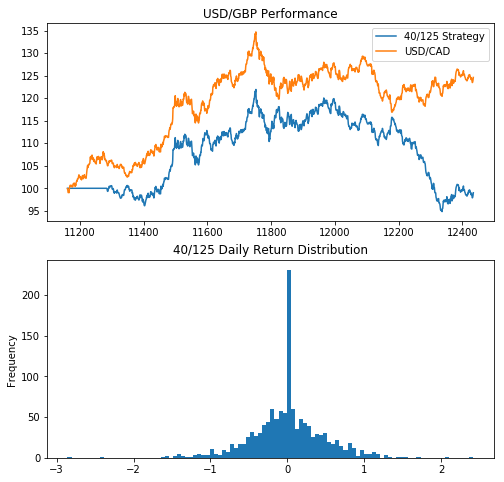

In [34]:
############################################################## 40/125 ##########################################################
usdcad = usdcad.loc[11160:12434]
usdcad['ShortMA'] = usdcad.VALUE.rolling(40).mean()
usdcad['LongMA'] = usdcad.VALUE.rolling(125).mean()

usdcad['Differential'] = usdcad['ShortMA'] - usdcad['LongMA']

X = 0
usdcad['Stance'] = np.where(usdcad['Differential'] > X, 1, 0)
usdcad['Stance'] = np.where(usdcad['Differential'] < X, -1, usdcad['Stance'])
usdcad['Stance'].value_counts()

usdcad['Returns'] = usdcad.VALUE.pct_change()[1:] * 100
usdcad['Strategy'] = usdcad['Returns'] * usdcad['Stance'].shift(1)

usdcad['StrategyPerformance'] = usdcad['Strategy'].cumsum() + 100

usdcad['StrategySuccess'] = np.where(usdcad['Strategy'] > 1, 1, 0)

## Performance
print("40/125 Strategy" "\n")
plt.subplot(2,1,1)
print(usdcad['Strategy'].describe());
usdcad['StrategyPerformance'].plot(figsize = (8,8), label='40/125 Strategy');
plt.plot(usdcad['Returns'].cumsum() + 100, label='USD/CAD');
plt.legend()
plt.title("USD/CAD Performance");

## Distributions
plt.subplot(2,1,2)
usdcad['Strategy'].plot(kind='hist', figsize=(8,8), title='40/125 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdcad['Strategy'].skew(),4));
print("Kurtosis:",round(usdcad['Strategy'].kurt(),4));

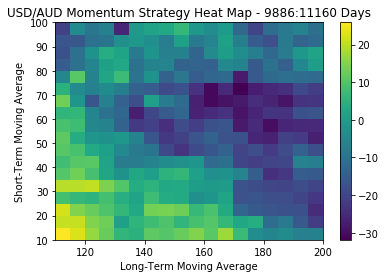

110    25.910135
115    22.740313
120    20.660958
125    14.505987
130    10.116026
135     5.705438
140    13.616987
145    14.118734
150    13.008225
155    14.906940
160    13.621761
165    17.333688
170     7.245145
175     3.793254
180    -5.568689
185    -3.965256
190    -1.204993
195     1.744327
200    -7.104529
dtype: float64
10     25.910135
15     20.902474
20     22.231856
25      8.729100
30     20.660958
35     13.417017
40     10.947554
45     10.714018
50     11.573451
55      9.088880
60      6.111303
65     13.423500
70      5.040351
75     10.832454
80      2.811988
85      4.038528
90      1.119926
95      6.686385
100    13.621761
dtype: float64


In [36]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXALUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/AUD Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

10/110 Strategy

count    1274.000000
mean        0.003335
std         0.594631
min        -2.385839
25%        -0.307148
50%         0.000000
75%         0.300651
max         2.771333
Name: Strategy, dtype: float64

Skew: 0.0615
Kurtosis: 2.0313


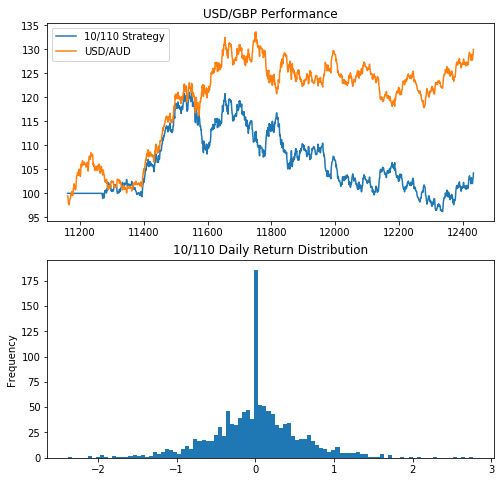

In [37]:
############################################################## 10/110 ##########################################################
usdaud = usdaud.loc[11160:12434]
usdaud['ShortMA'] = usdaud.VALUE.rolling(10).mean()
usdaud['LongMA'] = usdaud.VALUE.rolling(110).mean()

usdaud['Differential'] = usdaud['ShortMA'] - usdaud['LongMA']

X = 0
usdaud['Stance'] = np.where(usdaud['Differential'] > X, 1, 0)
usdaud['Stance'] = np.where(usdaud['Differential'] < X, -1, usdaud['Stance'])
usdaud['Stance'].value_counts()

usdaud['Returns'] = usdaud.VALUE.pct_change()[1:] * 100
usdaud['Strategy'] = usdaud['Returns'] * usdaud['Stance'].shift(1)

usdaud['StrategyPerformance'] = usdaud['Strategy'].cumsum() + 100

usdaud['StrategySuccess'] = np.where(usdaud['Strategy'] > 1, 1, 0)

## Performance
print("10/110 Strategy" "\n")
plt.subplot(2,1,1)
print(usdaud['Strategy'].describe());
usdaud['StrategyPerformance'].plot(figsize = (8,8), label='10/110 Strategy');
plt.plot(usdaud['Returns'].cumsum() + 100, label='USD/AUD');
plt.legend()
plt.title("USD/AUD Performance");

## Distributions
plt.subplot(2,1,2)
usdaud['Strategy'].plot(kind='hist', figsize=(8,8), title='10/110 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdaud['Strategy'].skew(),4));
print("Kurtosis:",round(usdaud['Strategy'].kurt(),4));

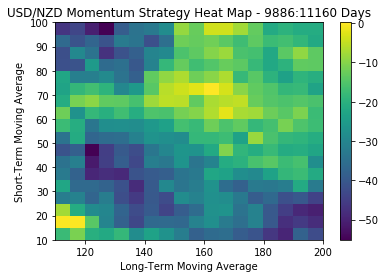

110    -0.174566
115    -0.132838
120    -9.493301
125   -13.392578
130   -13.526100
135   -16.236571
140    -8.025594
145    -5.417855
150    -4.055573
155    -2.214725
160     0.177114
165    -2.152946
170    -5.060251
175    -7.714264
180   -12.240732
185   -11.209716
190    -9.064355
195   -13.441738
200    -7.041261
dtype: float64
10    -10.948959
15     -0.132838
20     -7.574063
25    -26.576485
30    -21.529166
35    -17.390020
40    -14.293394
45    -10.236985
50     -8.310130
55    -11.209716
60     -2.152946
65     -5.060251
70      0.177114
75     -6.595570
80    -11.653162
85     -7.041261
90    -11.861461
95     -3.744722
100    -3.528203
dtype: float64


In [38]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXNZUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/NZD Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

10/160 Strategy

count    1274.000000
mean        0.001551
std         0.643837
min        -3.036351
25%        -0.337122
50%         0.000000
75%         0.303694
max         3.423555
Name: Strategy, dtype: float64

Skew: 0.3272
Kurtosis: 2.6302


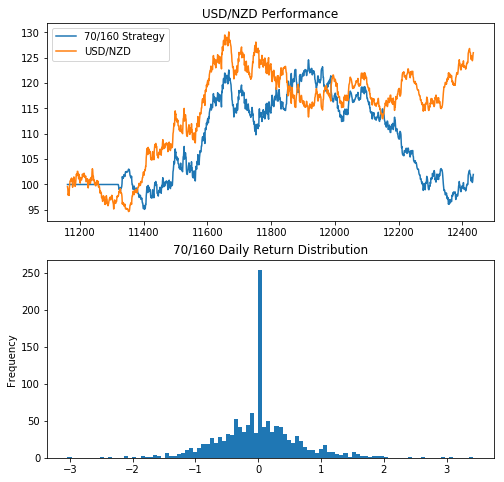

In [39]:
############################################################## 70/160 ##########################################################
usdnzd = usdnzd.loc[11160:12434]
usdnzd['ShortMA'] = usdnzd.VALUE.rolling(70).mean()
usdnzd['LongMA'] = usdnzd.VALUE.rolling(160).mean()

usdnzd['Differential'] = usdnzd['ShortMA'] - usdnzd['LongMA']

X = 0
usdnzd['Stance'] = np.where(usdnzd['Differential'] > X, 1, 0)
usdnzd['Stance'] = np.where(usdnzd['Differential'] < X, -1, usdnzd['Stance'])
usdnzd['Stance'].value_counts()

usdnzd['Returns'] = usdnzd.VALUE.pct_change()[1:] * 100
usdnzd['Strategy'] = usdnzd['Returns'] * usdnzd['Stance'].shift(1)

usdnzd['StrategyPerformance'] = usdnzd['Strategy'].cumsum() + 100

usdnzd['StrategySuccess'] = np.where(usdnzd['Strategy'] > 1, 1, 0)

## Performance
print("10/160 Strategy" "\n")
plt.subplot(2,1,1)
print(usdnzd['Strategy'].describe());
usdnzd['StrategyPerformance'].plot(figsize = (8,8), label='70/160 Strategy');
plt.plot(usdnzd['Returns'].cumsum() + 100, label='USD/NZD');
plt.legend()
plt.title("USD/NZD Performance");

## Distributions
plt.subplot(2,1,2)
usdnzd['Strategy'].plot(kind='hist', figsize=(8,8), title='70/160 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdnzd['Strategy'].skew(),4));
print("Kurtosis:",round(usdnzd['Strategy'].kurt(),4));

# usd/sek

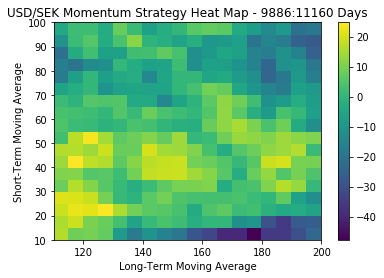

110    20.917587
115    24.717820
120    23.596137
125    24.230069
130    15.940562
135    11.832250
140    20.140773
145    18.712466
150    18.982606
155    14.341390
160    11.411978
165    12.682047
170    15.174100
175    12.316672
180    18.638806
185    20.085131
190    16.148323
195    10.629512
200     9.032396
dtype: float64
10     16.484038
15     18.784751
20     24.230069
25     20.917587
30     16.730624
35     18.913567
40     24.717820
45     20.140773
50     23.596137
55     15.174100
60     12.682047
65     12.498831
70      9.242260
75      0.126132
80      2.242463
85      7.124398
90     11.832250
95      7.918743
100     9.652180
dtype: float64


In [40]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXSDUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/SEK Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

40/115 Strategy

count    1319.000000
mean        0.000374
std         0.570092
min        -3.295613
25%        -0.275452
50%         0.000000
75%         0.312960
max         2.919102
Name: Strategy, dtype: float64

Skew: -0.2223
Kurtosis: 2.9935


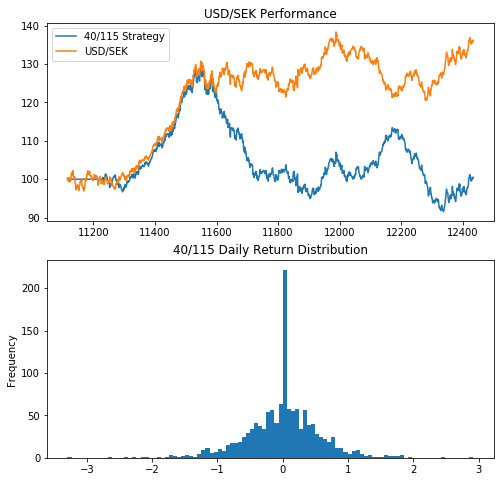

In [45]:
############################################################## 40/115 ##########################################################
usdsek = usdsek.loc[11115:12434]
usdsek['ShortMA'] = usdsek.VALUE.rolling(40).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(115).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)

usdsek['StrategyPerformance'] = usdsek['Strategy'].cumsum() + 100

usdsek['StrategySuccess'] = np.where(usdsek['Strategy'] > 1, 1, 0)

## Performance
print("40/115 Strategy" "\n")
plt.subplot(2,1,1)
print(usdsek['Strategy'].describe());
usdsek['StrategyPerformance'].plot(figsize = (8,8), label='40/115 Strategy');
plt.plot(usdsek['Returns'].cumsum() + 100, label='USD/SEK');
plt.legend()
plt.title("USD/SEK Performance");

## Distributions
plt.subplot(2,1,2)
usdsek['Strategy'].plot(kind='hist', figsize=(8,8), title='40/115 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdsek['Strategy'].skew(),4));
print("Kurtosis:",round(usdsek['Strategy'].kurt(),4));

# usd/nok

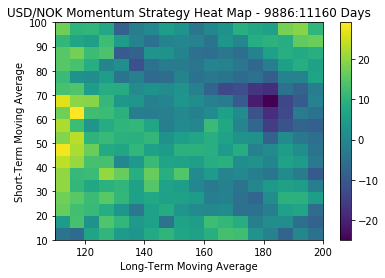

110    28.206081
115    29.091497
120    19.323948
125    20.301816
130    16.507672
135    10.700679
140    16.523277
145    10.187553
150    14.399655
155     9.657937
160    12.375156
165    12.880444
170    13.920614
175     8.562509
180     9.868765
185    20.492884
190    19.563746
195    16.852576
200    16.494483
dtype: float64
10     12.880444
15     14.147482
20     16.523227
25     17.326663
30     20.176617
35     20.301816
40     23.636828
45     28.206081
50     23.276114
55     22.541509
60     29.091497
65     26.444086
70     14.173231
75     11.638493
80     14.896555
85     17.580619
90     16.852576
95     19.268026
100    22.975513
dtype: float64


In [43]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstratsplice('DEXNOUS',9886,11160,sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/NOK Momentum Strategy Heat Map - 9886:11160 Days")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

60/115 Strategy

count    1319.000000
mean        0.013256
std         0.569938
min        -3.295613
25%        -0.272886
50%         0.000000
75%         0.315329
max         2.919102
Name: Strategy, dtype: float64

Skew: -0.0945
Kurtosis: 3.005


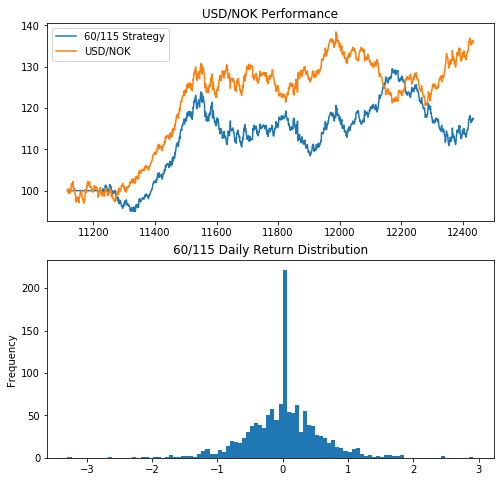

In [44]:
############################################################## 60/115 ##########################################################
usdsek = usdsek.loc[11115:12434]
usdsek['ShortMA'] = usdsek.VALUE.rolling(60).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(115).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)

usdsek['StrategyPerformance'] = usdsek['Strategy'].cumsum() + 100

usdsek['StrategySuccess'] = np.where(usdsek['Strategy'] > 1, 1, 0)

## Performance
print("60/115 Strategy" "\n")
plt.subplot(2,1,1)
print(usdsek['Strategy'].describe());
usdsek['StrategyPerformance'].plot(figsize = (8,8), label='60/115 Strategy');
plt.plot(usdsek['Returns'].cumsum() + 100, label='USD/NOK');
plt.legend()
plt.title("USD/NOK Performance");

## Distributions
plt.subplot(2,1,2)
usdsek['Strategy'].plot(kind='hist', figsize=(8,8), title='60/115 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdsek['Strategy'].skew(),4));
print("Kurtosis:",round(usdsek['Strategy'].kurt(),4));